1. Analysy

In [11]:
import pandas as pd
import numpy as np

# Analysy Price Data
full_data = pd.read_csv('../data/processed_data.csv', parse_dates=['Date'], index_col='Date')
price_data = full_data[['Price']]

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def check_stationarity(series, title="Series"):
    # ADF检验 (H0: 非平稳)
    adf_result = adfuller(series.dropna())
    print(f"ADF Test:")
    print(f"  Statistic: {adf_result[0]:.6f}")
    print(f"  p-value: {adf_result[1]:.6f}")
    print(f"  Critical Values: {adf_result[4]}")
    adf_stationary = adf_result[1] <= 0.05
    
    # KPSS检验 (H0: 平稳)
    kpss_result = kpss(series.dropna())
    print(f"KPSS Test:")
    print(f"  Statistic: {kpss_result[0]:.6f}")
    print(f"  p-value: {kpss_result[1]:.6f}")
    print(f"  Critical Values: {kpss_result[3]}")
    kpss_stationary = kpss_result[1] > 0.05
    
    # 综合判断
    if adf_stationary and kpss_stationary:
        print("  Conclusion: STATIONARY (both tests agree)")
        return True
    elif not adf_stationary and not kpss_stationary:
        print("  Conclusion: NON-STATIONARY (both tests agree)")
        return False
    else:
        print("  Conclusion: INCONCLUSIVE (tests disagree)")
        return False

def plot_acf_pacf(ts, title, lags=40):
    """
    Plot ACF and PACF charts
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    plot_acf(ts.dropna(), lags=lags, ax=ax1, title=f'ACF - {title}')
    plot_pacf(ts.dropna(), lags=lags, ax=ax2, title=f'PACF - {title}')
    
    plt.tight_layout()
    plt.show()


ADF Test:
  Statistic: -1.294832
  p-value: 0.631533
  Critical Values: {'1%': np.float64(-3.4339382310452033), '5%': np.float64(-2.863125003847544), '10%': np.float64(-2.56761380228936)}
KPSS Test:
  Statistic: 4.017184
  p-value: 0.010000
  Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
  Conclusion: NON-STATIONARY (both tests agree)


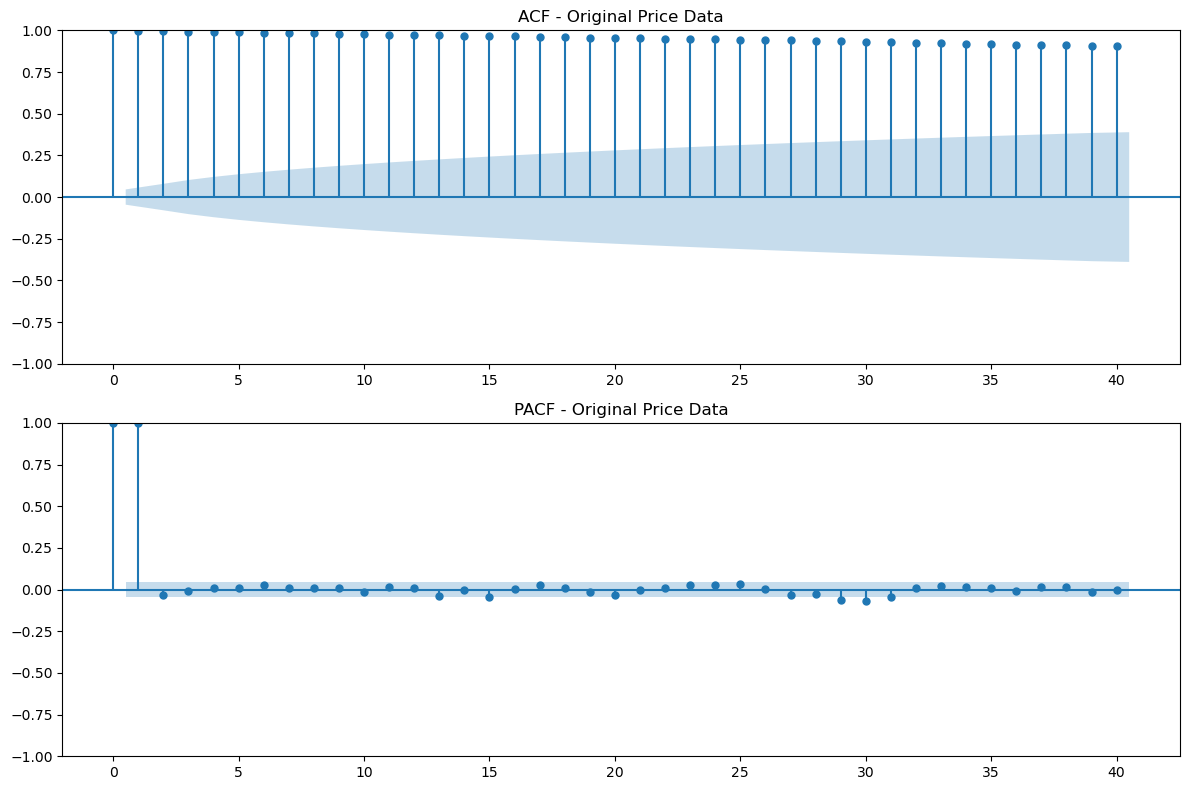


Original data is non-stationary, performing first differencing...
ADF Test:
  Statistic: -40.432989
  p-value: 0.000000
  Critical Values: {'1%': np.float64(-3.4339382310452033), '5%': np.float64(-2.863125003847544), '10%': np.float64(-2.56761380228936)}
KPSS Test:
  Statistic: 0.210714
  p-value: 0.100000
  Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
  Conclusion: STATIONARY (both tests agree)


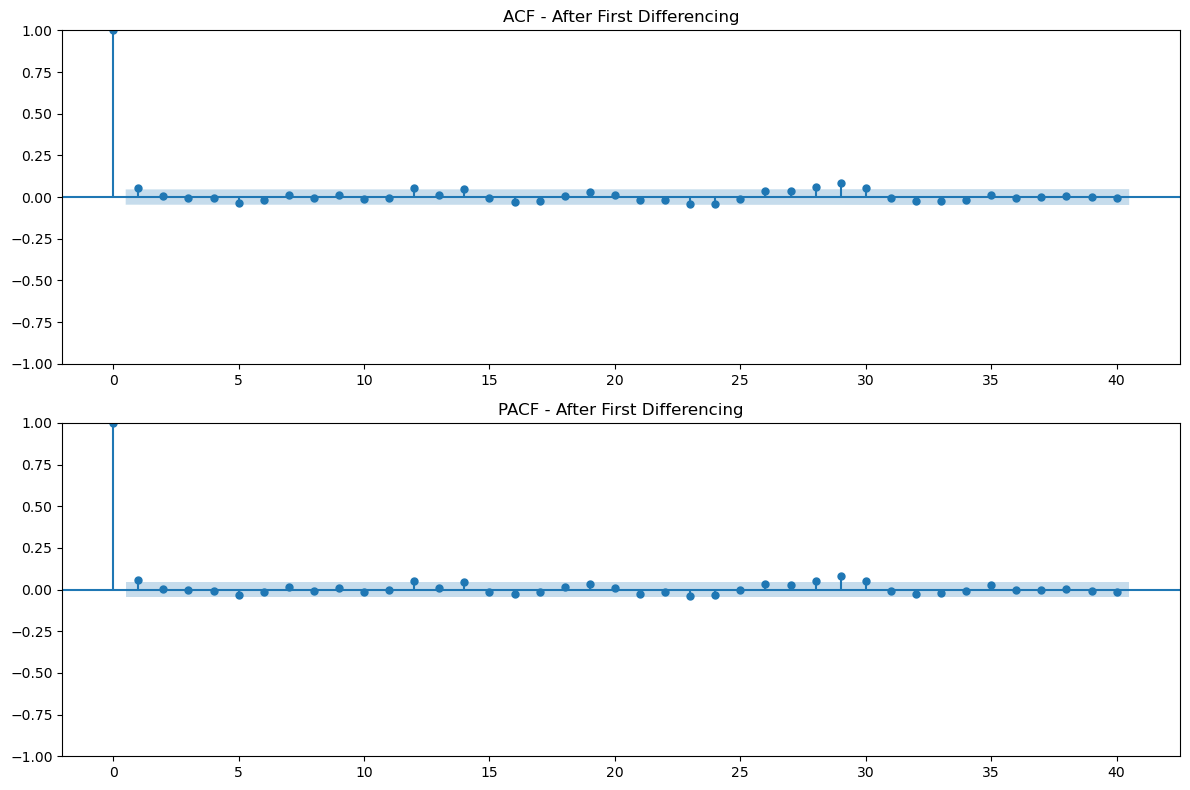

In [13]:
# Check stationarity of original data
is_stationary = check_stationarity(price_data, "Original Price Data")
plot_acf_pacf(price_data, "Original Price Data")

# If non-stationary, perform differencing
if not is_stationary:
    print("\nOriginal data is non-stationary, performing first differencing...")
    price_data_diff = price_data.diff().dropna()
    is_stationary_diff = check_stationarity(price_data_diff, "After First Differencing")
    plot_acf_pacf(price_data_diff, "After First Differencing")
    
    # If first differencing is still non-stationary, try second differencing
    if not is_stationary_diff:
        print("\nFirst differencing still non-stationary, performing second differencing...")
        price_data_diff2 = price_data_diff.diff().dropna()
        is_stationary_diff2 = check_stationarity(price_data_diff2, "After Second Differencing")
        plot_acf_pacf(price_data_diff2, "After Second Differencing")

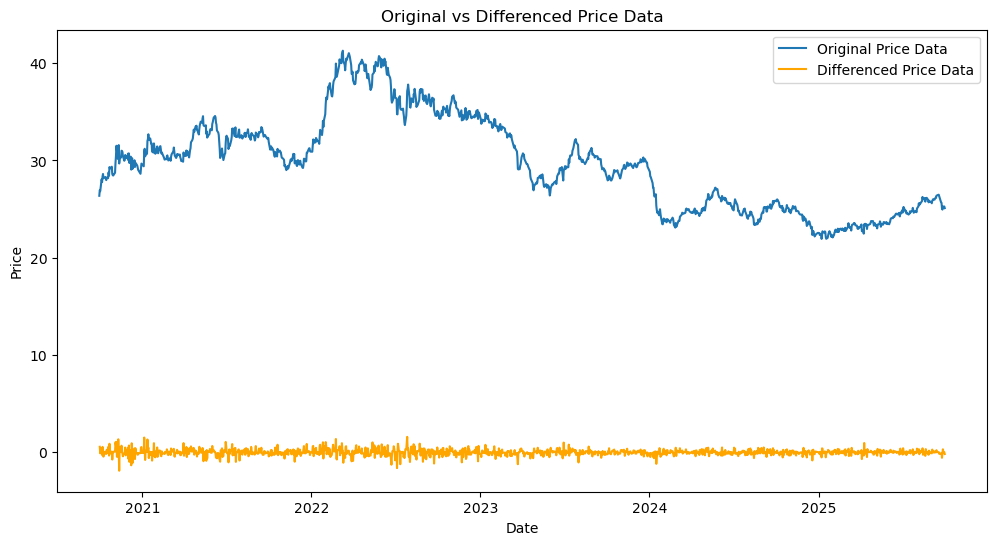

In [14]:
# plot original and differenced series
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['Price'], label='Original Price Data')
plt.plot(price_data_diff.index, price_data_diff['Price'], label='Differenced Price Data', color='orange')
plt.title('Original vs Differenced Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()